## EDA with Matplotlib and Seaborn

In [67]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [68]:
df=pd.read_csv("titanic.csv")

In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [70]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


{'whiskers': [<matplotlib.lines.Line2D at 0x1cff268ec10>,
 'caps': [<matplotlib.lines.Line2D at 0x1cff26811f0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1cff268e940>],
 'medians': [<matplotlib.lines.Line2D at 0x1cff2681670>],
 'fliers': [<matplotlib.lines.Line2D at 0x1cff2681940>],
 'means': []}

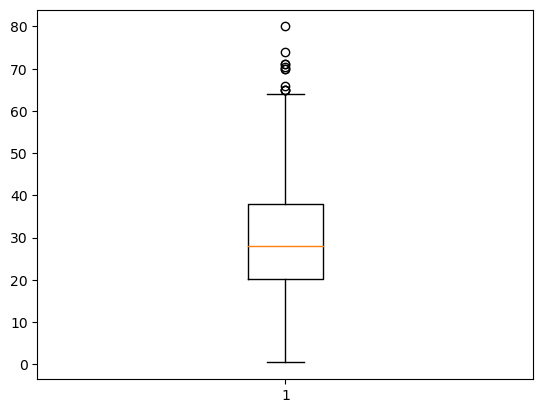

In [71]:
plt.boxplot(df["Age"].dropna())

In [72]:
dftemp=df[["Age","Sex"]]
dftemp=dftemp.dropna()
maleTemp=dftemp[dftemp["Sex"]=="male"]
femaleTemp=dftemp[dftemp["Sex"]=="female"]

## Boxplots mainly visualize summary statistics and violin plots also provide overview of the shape of the graph

{'whiskers': [<matplotlib.lines.Line2D at 0x1cff526c2e0>,
 'caps': [<matplotlib.lines.Line2D at 0x1cff526c880>,
 'boxes': [<matplotlib.lines.Line2D at 0x1cff526dfd0>,
 'medians': [<matplotlib.lines.Line2D at 0x1cff526ce20>,
 'fliers': [<matplotlib.lines.Line2D at 0x1cff5111ac0>,
 'means': []}

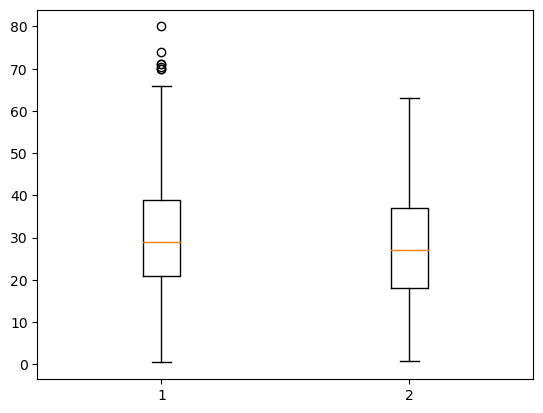

In [73]:
#box plot of male and female
plt.boxplot([maleTemp["Age"],femaleTemp["Age"]])

In [74]:
import seaborn as sns

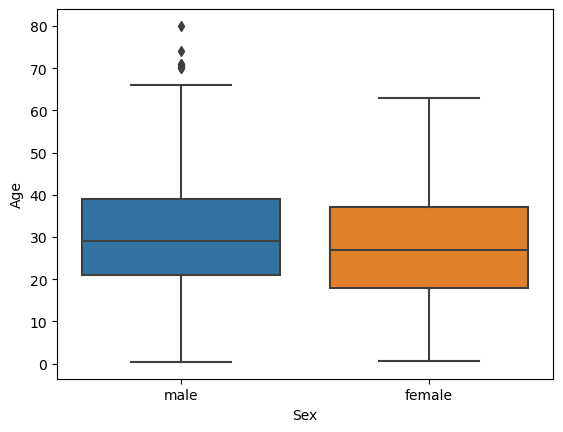

In [75]:
sns.boxplot(data=df,x="Sex",y="Age");

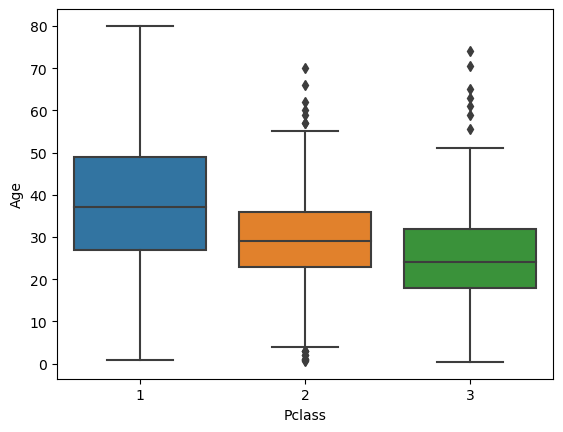

In [76]:
sns.boxplot(data=df,x="Pclass",y="Age");

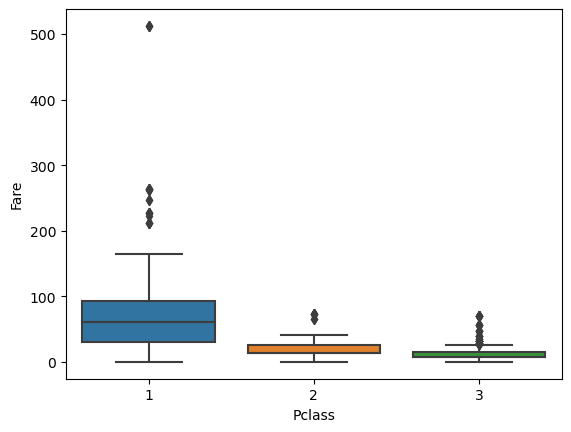

In [77]:
sns.boxplot(data=df,x="Pclass",y="Fare");

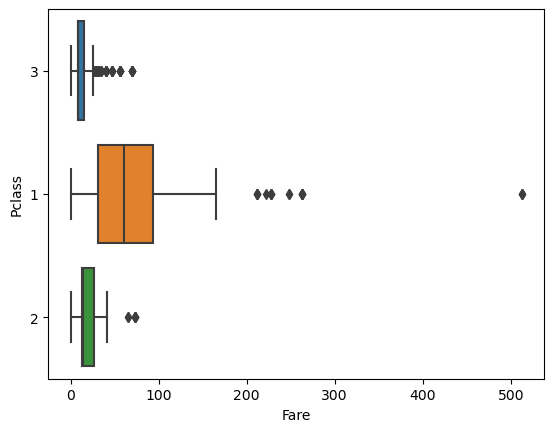

In [78]:
#change passenger class to str type to match expected catergorical output for parameter
df["Pclass"]=df["Pclass"].apply(str)
sns.boxplot(data=df,x="Fare",y="Pclass");

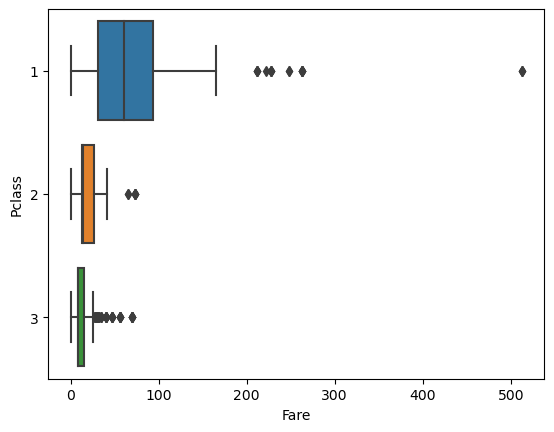

In [79]:
sns.boxplot(data=df,x="Fare",y="Pclass",order=["1","2","3"]);

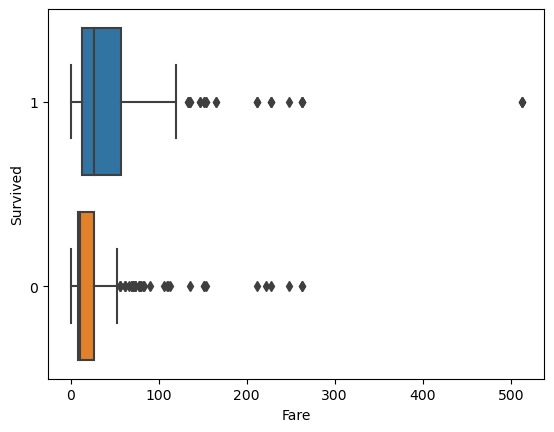

In [80]:
df["Survived"]=df["Survived"].apply(str)
sns.boxplot(data=df,x="Fare",y="Survived",order=["1","0"]);

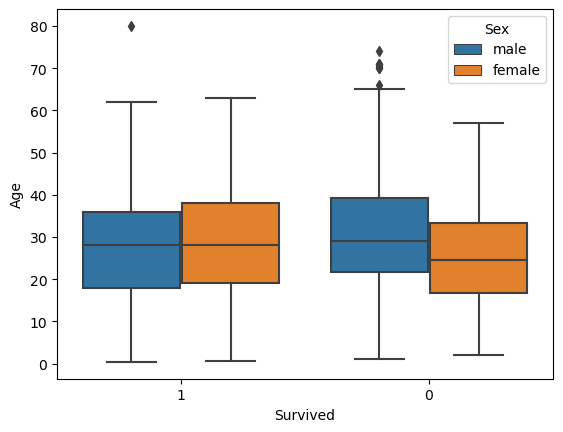

In [81]:
#subgroupo of 2 genders
sns.boxplot(data=df,x="Survived",y="Age",hue="Sex",order=["1","0"]);

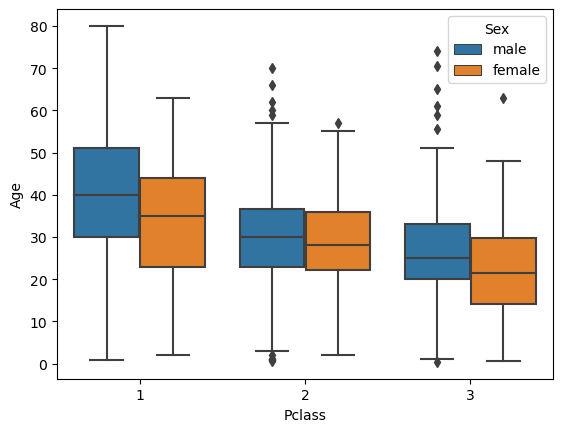

In [82]:
sns.boxplot(data=df,x="Pclass",y="Age",hue="Sex",order=["1","2","3"]);

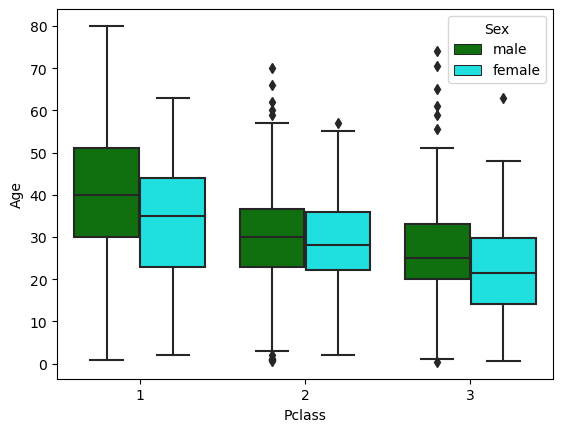

In [83]:
df2=df.sort_values(["Pclass","Survived"])
sns.boxplot(data=df2,x="Pclass",y="Age",hue="Sex",palette=["Green","Cyan"]);

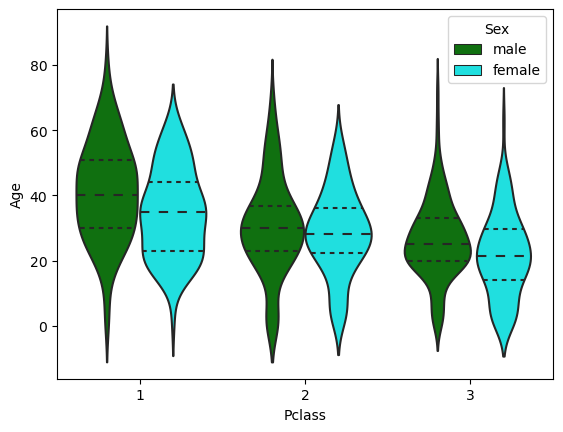

In [84]:
sns.violinplot(data=df2,x="Pclass",y="Age",hue="Sex",palette=["Green","Cyan"],inner="quartile");

Text(0, 0.5, 'Frequency')

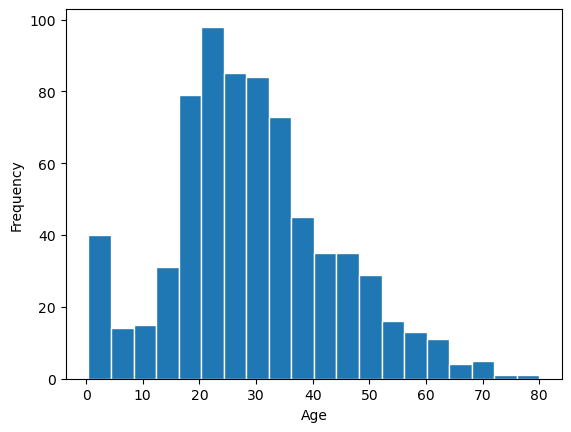

In [85]:
#First array represents frequencies and 2nd array represents amount of bins
plt.hist(df["Age"],edgecolor="white",bins=20);
plt.xlabel("Age")
plt.ylabel("Frequency")

In [86]:
import matplotlib.mlab as mlab
from scipy.stats import norm

In [87]:
mu,sigma=norm.fit(df["Age"].dropna())

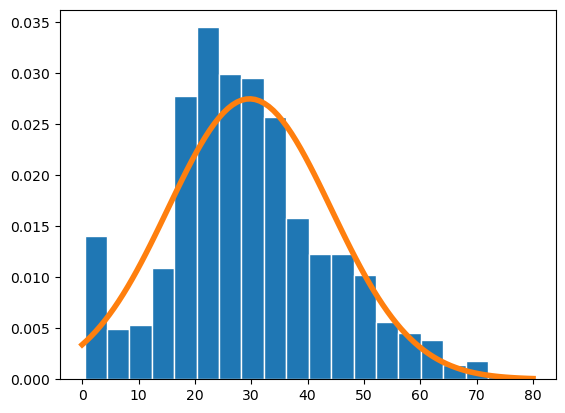

In [94]:
plt.hist(df["Age"],edgecolor="white",bins=20,density=True);
ages=np.linspace(0,80,100)
plt.plot(ages,norm.pdf(ages,mu,sigma),linewidth=4)
dfnum=df[[])

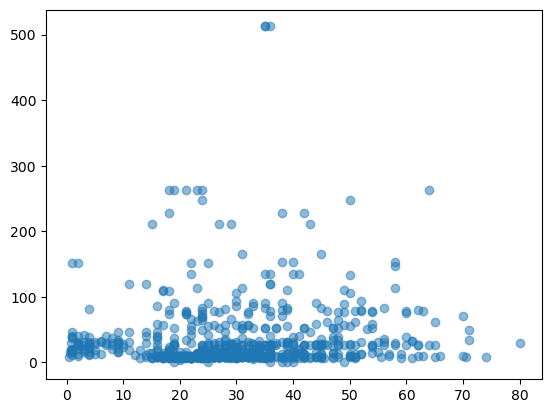

In [98]:
dfnum=df[["Age","Fare"]]
dfnum=dfnum.dropna()

plt.scatter(x=dfnum["Age"],y=dfnum["Fare"],alpha=0.5)

C:\Users\Steve\anaconda3\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


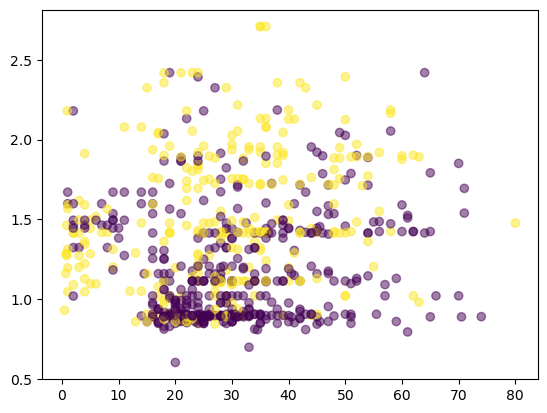

In [105]:
dfnum=df[["Age","Fare","Survived","Pclass"]]
dfnum=dfnum.dropna()

plt.scatter(x=dfnum["Age"],y=np.log10(dfnum["Fare"]),c=pd.to_numeric(dfnum["Survived"]),alpha=0.5)

C:\Users\Steve\anaconda3\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


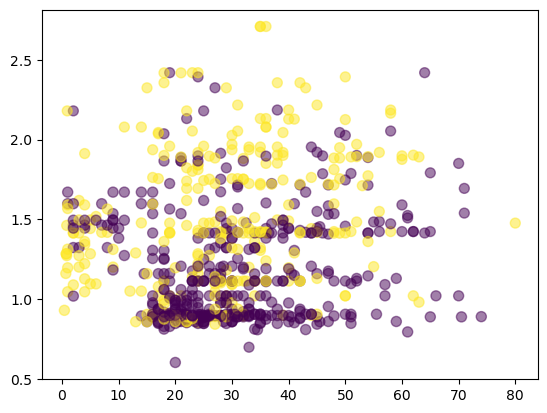

In [110]:
dfnum=df[["Age","Fare","Survived","Pclass"]]
dfnum=dfnum.dropna()

plt.scatter(x=dfnum["Age"],y=np.log10(dfnum["Fare"]),c=pd.to_numeric(dfnum["Survived"]),s=pd.to_numeric(dfnum["Pclass"])+50,alpha=0.5)

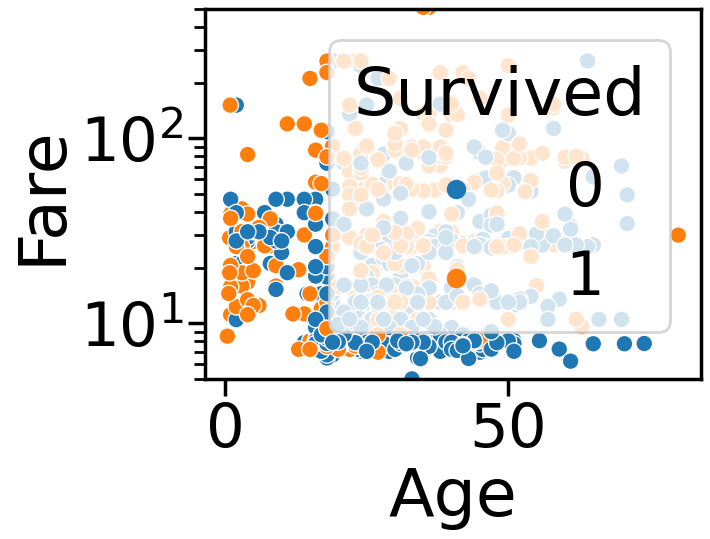

In [123]:
p=sns.scatterplot(data=df,x="Age",y="Fare",hue="Survived")
p.set_yscale("log")
plt.ylim(5,500);

plt.savefig("test_fig_1.svg")
sns.set_context("poster",font_scale=2)

In [124]:
sns.plotting_context()

{'font.size': 48.0,
 'axes.labelsize': 48.0,
 'axes.titlesize': 48.0,
 'xtick.labelsize': 44.0,
 'ytick.labelsize': 44.0,
 'legend.fontsize': 44.0,
 'axes.linewidth': 2.5,
 'grid.linewidth': 2.0,
 'lines.linewidth': 3.0,
 'lines.markersize': 12.0,
 'patch.linewidth': 2.0,
 'xtick.major.width': 2.5,
 'ytick.major.width': 2.5,
 'xtick.minor.width': 2.0,
 'ytick.minor.width': 2.0,
 'xtick.major.size': 12.0,
 'ytick.major.size': 12.0,
 'xtick.minor.size': 8.0,
 'ytick.minor.size': 8.0,
 'legend.title_fontsize': 48.0}

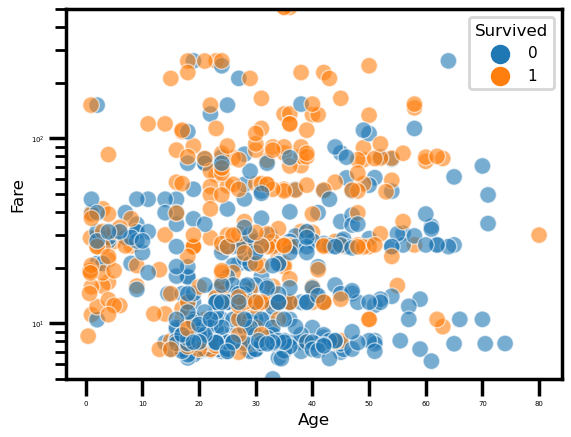

In [129]:
sns.set_context("poster",font_scale=.5,rc={"grid.linewidth":2,"xtick.labelsize":5,"ytick.labelsize":5})

p=sns.scatterplot(data=df,x="Age",y="Fare",hue="Survived",alpha=.6)
p.set_yscale("log")
plt.ylim(5,500);

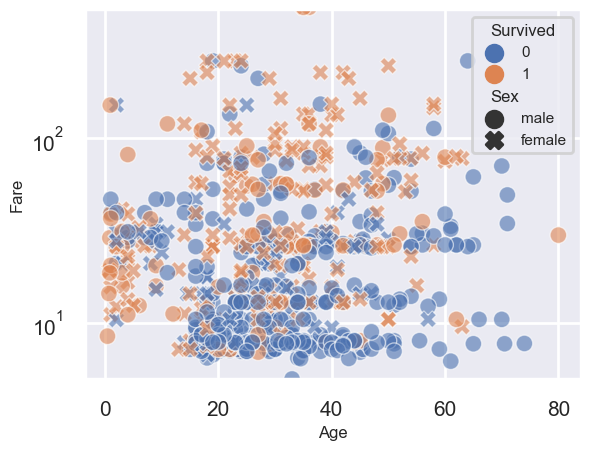

In [131]:
sns.set_theme()

sns.set_context("poster",font_scale=.5
                ,rc={"grid.linewidth":2,"xtick.labelsize":15,"ytick.labelsize":15})

p=sns.scatterplot(data=df,x="Age",y="Fare",hue="Survived",style="Sex",alpha=.6)
p.set_yscale("log")
plt.ylim(5,500);

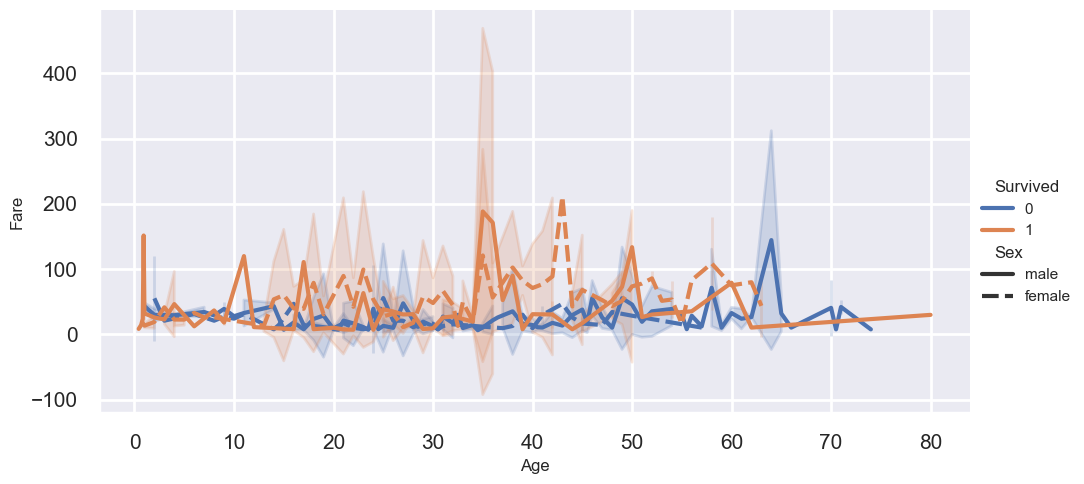

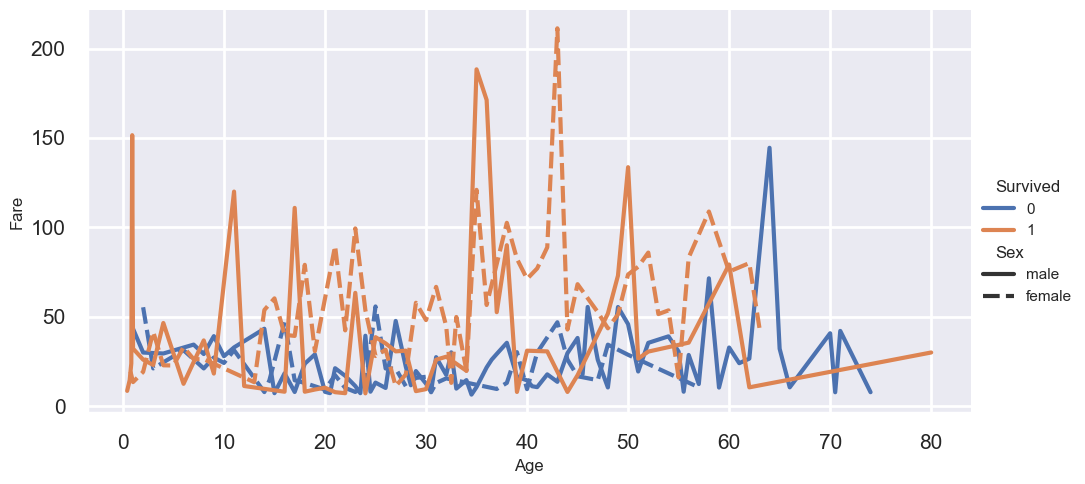

In [142]:
#For most values of age the orange curve is above the bluer cove The ticket values of those who survived are more than those who didnnt survive
sns.relplot(data=df,x="Age",y="Fare",hue="Survived",style="Sex",kind="line",ci="sd",aspect=2)
sns.relplot(data=df,x="Age",y="Fare",hue="Survived",style="Sex",kind="line",ci=None,aspect=2)

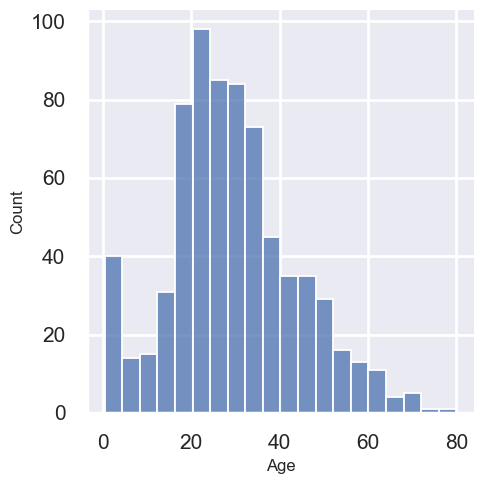

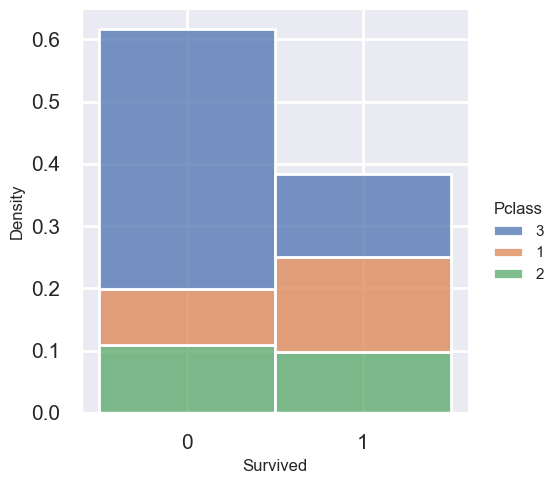

In [149]:
sns.displot(data=df,x="Age");
sns.displot(data=df,x="Survived",hue="Pclass",multiple="stack",stat="density");

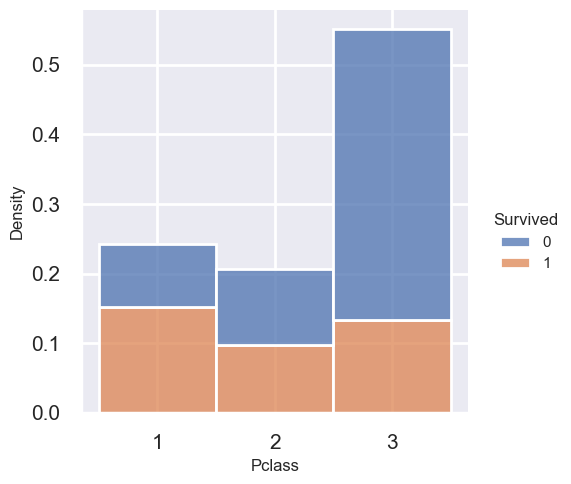

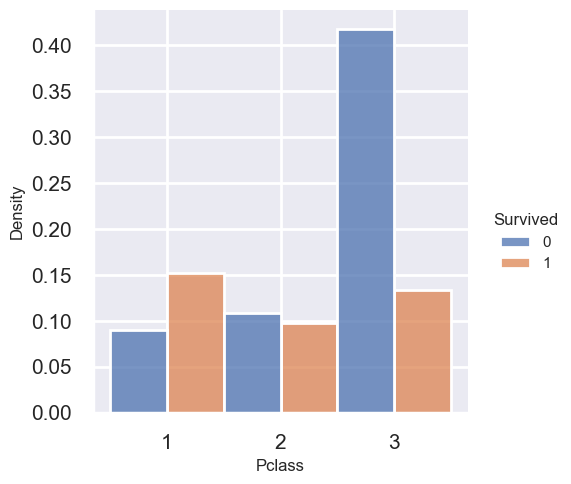

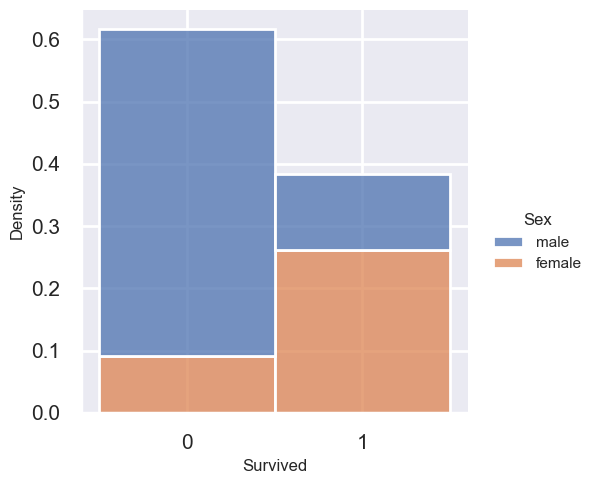

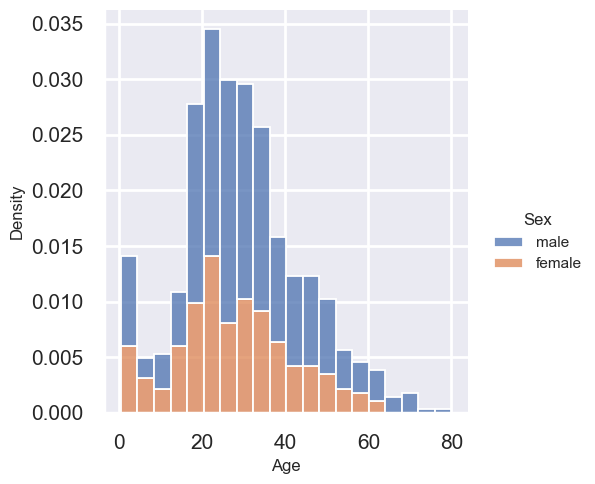

In [157]:
df3=df.sort_values(["Pclass","Survived"])
sns.displot(data=df3,x="Pclass",hue="Survived",multiple="stack",stat="density");
sns.displot(data=df3,x="Pclass",hue="Survived",multiple="dodge",stat="density");
sns.displot(data=df3,x="Survived",hue="Sex",multiple="stack",stat="density");
sns.displot(data=df3,x="Age",hue="Sex",multiple="stack",stat="density");

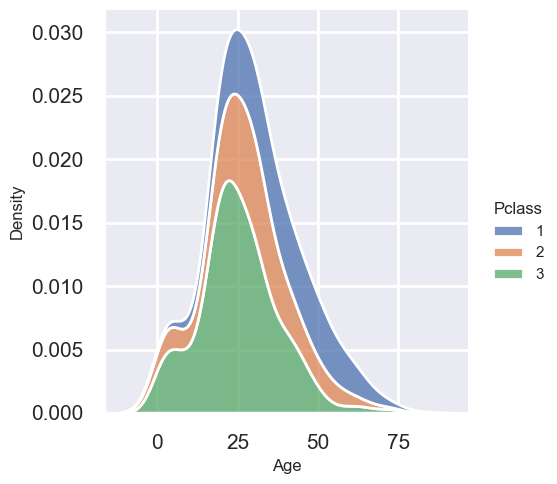

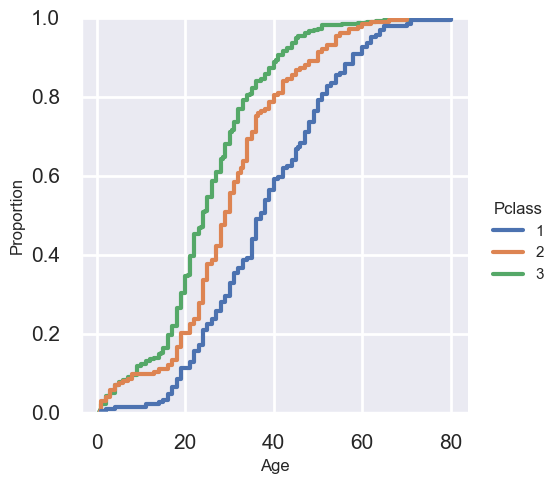

In [163]:
sns.displot(data=df2,x="Age",hue="Pclass",kind="kde",multiple="stack");
sns.displot(data=df2,x="Age",hue="Pclass",kind="ecdf");


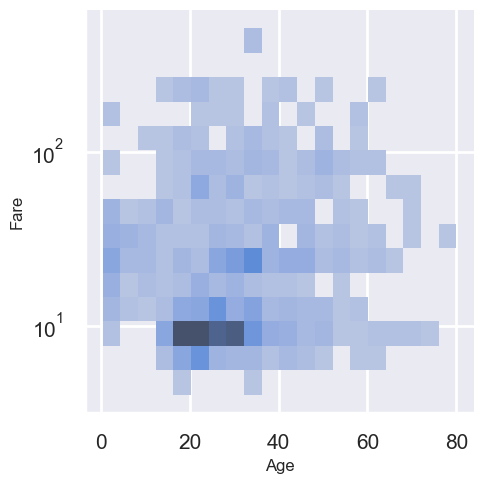

In [165]:
df4=df
df4=df4[df4["Age"]!=0]
df4=df4[df4["Fare"]!=0]
sns.displot(data=df4,x="Age",y="Fare",log_scale=[False,True]);

In [172]:
bm=pd.read_csv("marathon_results_2017 (2).csv")
bm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26410 entries, 0 to 26409
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Name           26410 non-null  object 
 1   Age            26410 non-null  int64  
 2   M/F            26410 non-null  object 
 3   City           26410 non-null  object 
 4   State          22815 non-null  object 
 5   Country        26410 non-null  object 
 6   5K             26410 non-null  int64  
 7   10K            26410 non-null  int64  
 8   15K            26410 non-null  int64  
 9   20K            26410 non-null  int64  
 10  Half           26410 non-null  int64  
 11  25K            26410 non-null  int64  
 12  30K            26410 non-null  int64  
 13  35K            26410 non-null  int64  
 14  40K            26410 non-null  int64  
 15  Official Time  26410 non-null  int64  
 16  speed (km/h)   26410 non-null  float64
 17  speed (mph)    26410 non-null  float64
dtypes: flo

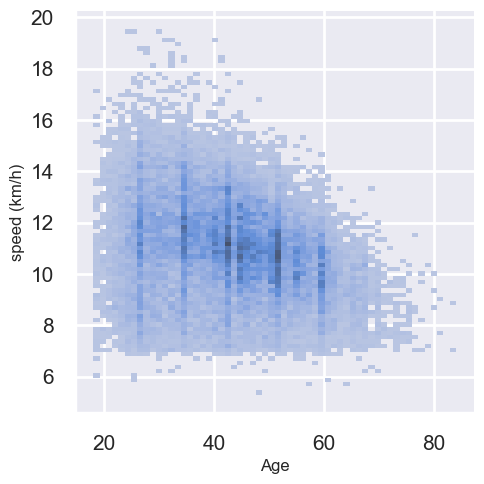

In [175]:
sns.displot(data=bm,x="Age",y="speed (km/h)")

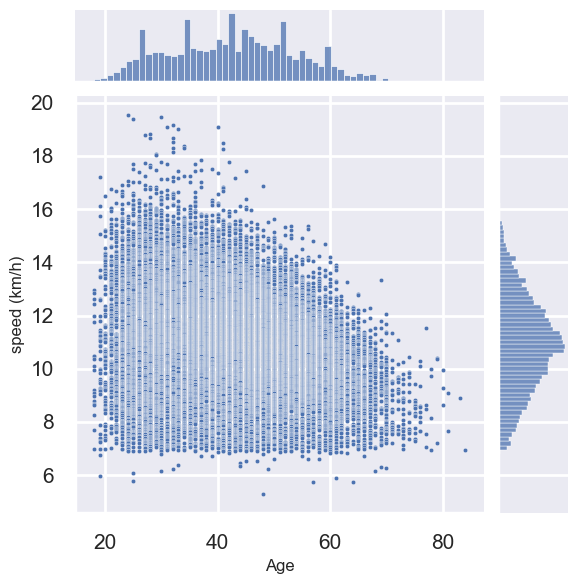

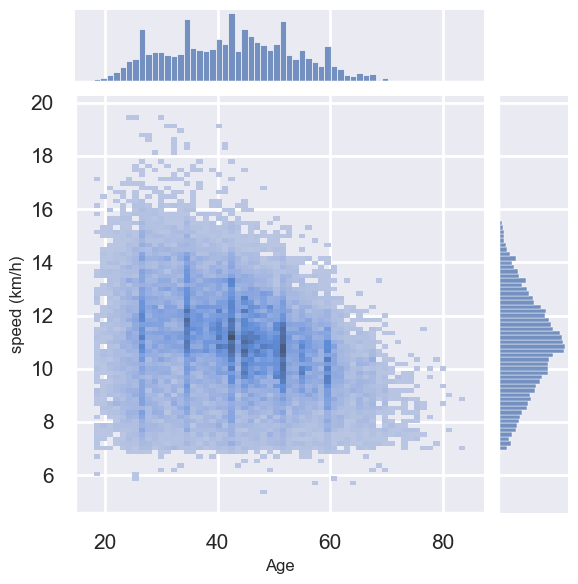

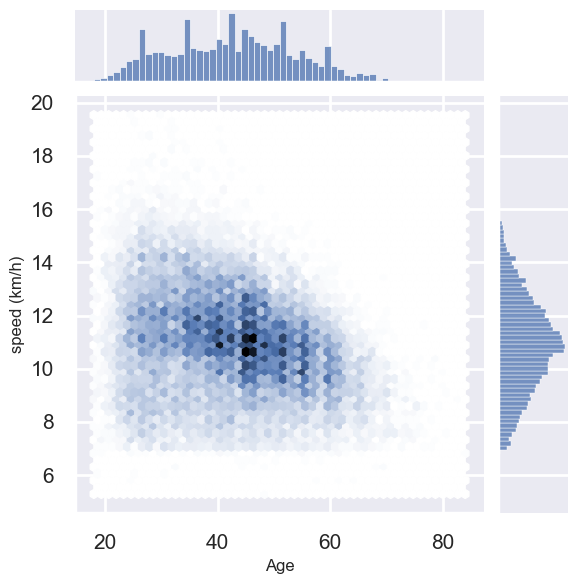

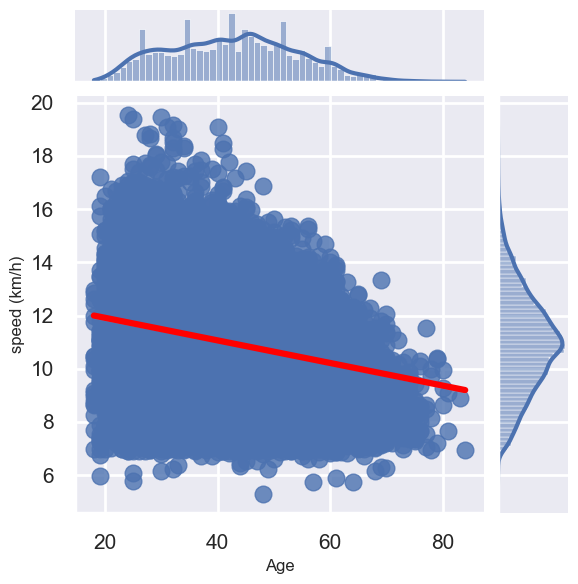

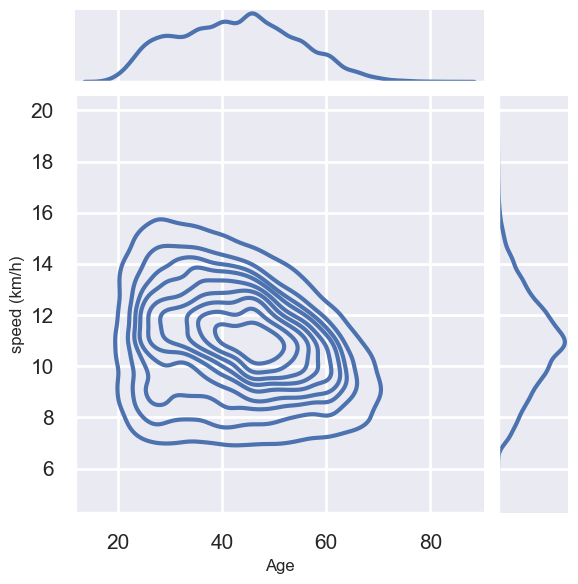

In [184]:
sns.jointplot(data=bm,x="Age",y="speed (km/h)",s=10)
sns.jointplot(data=bm,x="Age",y="speed (km/h)",kind="hist")
sns.jointplot(data=bm,x="Age",y="speed (km/h)",kind="hex")
sns.jointplot(data=bm,x="Age",y="speed (km/h)",kind="reg",line_kws={"color":"red"});


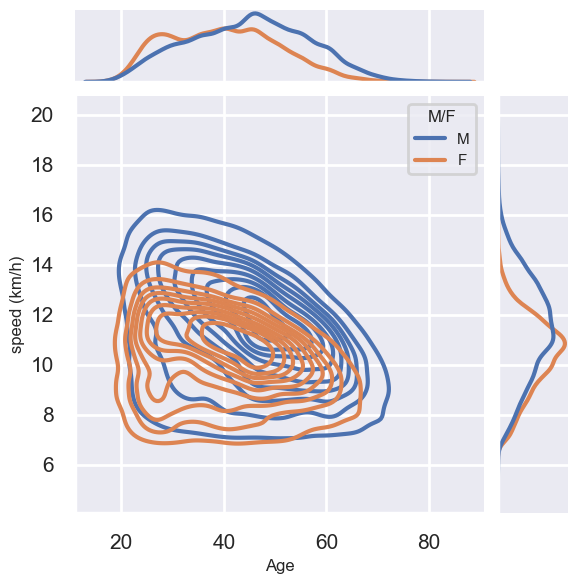

In [189]:
sns.jointplot(data=bm,x="Age",y="speed (km/h)",hue="M/F",kind="kde")

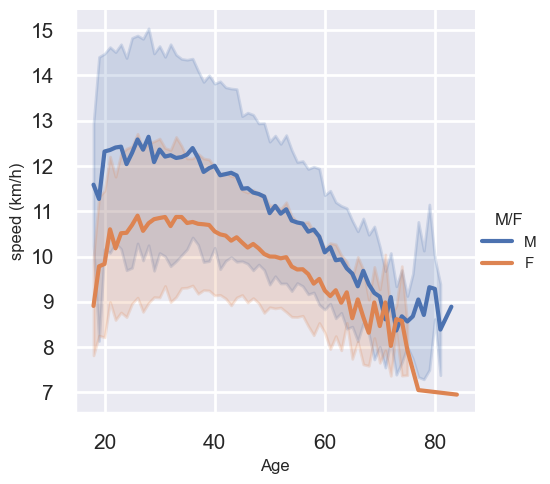

In [192]:
sns.relplot(data=bm,x="Age",y="speed (km/h)",hue="M/F",kind="line", ci="sd")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


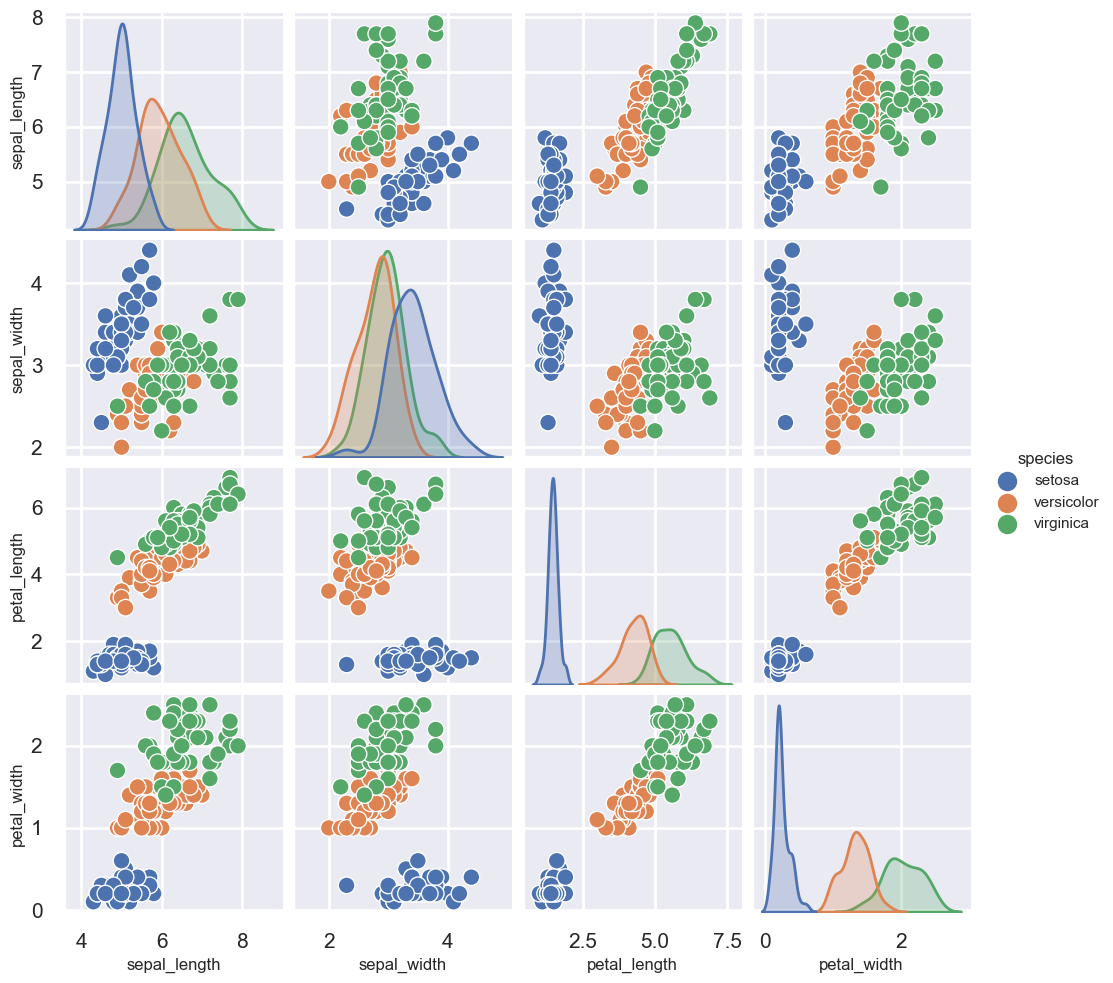

In [195]:
iris=pd.read_csv("iris.csv")
iris.info()
iris.head()
sns.pairplot(iris,hue="species")